##🛠️ Preparação dos Dados

In [173]:
# Bibliotecas usadas
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_auc_score
)

In [174]:
url = 'https://raw.githubusercontent.com/Thiagoibi/TelecomX_parte2_BR/refs/heads/main/dados_tratados.csv'

In [175]:
df = pd.read_csv(url)

In [176]:
df.head()

,Id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,tipo_de_internet,...,protecao_de_dispositivo,suporte_tecnico,tv_por_streaming,filmes_por_streaming,tipo_de_contrato,fatura_digital,forma_de_pagamento,gasto_mensal,gasto_total,contas_diarias
0,0002-ORFBO,No,Feminino,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,Um ano,Yes,Cheque enviado,65.6,593.30,2.197407
1,0003-MKNFE,No,Masculino,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Mês a mês,No,Cheque enviado,59.9,542.40,2.008889
2,0004-TLHLJ,Yes,Masculino,No,No,No,4,Yes,No,Fibra óptica,...,Yes,No,No,No,Mês a mês,Yes,Cheque eletrônico,73.9,280.85,2.340417
3,0011-IGKFF,Yes,Masculino,Yes,Yes,No,13,Yes,No,Fibra óptica,...,Yes,No,Yes,Yes,Mês a mês,Yes,Cheque eletrônico,98.0,1237.85,3.173974
4,0013-EXCHZ,Yes,Feminino,Yes,Yes,No,3,Yes,No,Fibra óptica,...,No,Yes,Yes,No,Mês a mês,Yes,Cheque enviado,83.9,267.40,2.971111


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id_cliente                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   genero                     7043 non-null   object 
 3   idoso                      7043 non-null   object 
 4   possui_parceiro            7043 non-null   object 
 5   possui_dependentes         7043 non-null   object 
 6   tempo_de_contato           7043 non-null   int64  
 7   servico_telefonico         7043 non-null   object 
 8   varias_linhas_telefonicas  7043 non-null   object 
 9   tipo_de_internet           7043 non-null   object 
 10  seguraca_online            7043 non-null   object 
 11  backup_online              7043 non-null   object 
 12  protecao_de_dispositivo    7043 non-null   object 
 13  suporte_tecnico            7043 non-null   objec

In [178]:
# Seleciona colunas onde os valores únicos são exatamente {"Yes", "No"}
colunas_yes_no = [
    col for col in df.columns
    if set(df[col].dropna().unique()) <= {"Yes", "No"}
]

# Faz a substituição e converte para inteiro
df[colunas_yes_no] = df[colunas_yes_no].replace({"Yes": 1, "No": 0}).astype(int)

/tmp/ipython-input-2090167599.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas_yes_no] = df[colunas_yes_no].replace({"Yes": 1, "No": 0}).astype(int)


In [179]:
df.head()

,Id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,tipo_de_internet,...,protecao_de_dispositivo,suporte_tecnico,tv_por_streaming,filmes_por_streaming,tipo_de_contrato,fatura_digital,forma_de_pagamento,gasto_mensal,gasto_total,contas_diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,Um ano,1,Cheque enviado,65.6,593.30,2.197407
1,0003-MKNFE,0,Masculino,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Mês a mês,0,Cheque enviado,59.9,542.40,2.008889
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,No,Fibra óptica,...,Yes,No,No,No,Mês a mês,1,Cheque eletrônico,73.9,280.85,2.340417
3,0011-IGKFF,1,Masculino,1,1,0,13,1,No,Fibra óptica,...,Yes,No,Yes,Yes,Mês a mês,1,Cheque eletrônico,98.0,1237.85,3.173974
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,No,Fibra óptica,...,No,Yes,Yes,No,Mês a mês,1,Cheque enviado,83.9,267.40,2.971111


In [180]:
# Encontra colunas que contêm o valor "No phone service"
colunas_com_no_phone_service = [col for col in df.columns if df[col].astype(str).str.contains("No phone service").any()]

# Verifica colunas que contêm o valor 'No phone service'
for col in colunas_com_no_phone_service:
    count = df[col].value_counts().get("No phone service", 0)
    print(f"Coluna '{col}': {count} ocorrência(s) de 'No phone service'")

Coluna 'varias_linhas_telefonicas': 682 ocorrência(s) de 'No phone service'


In [181]:
# Encontra colunas que contêm o valor "No phone service"
colunas_com_no_internet_service = [col for col in df.columns if df[col].astype(str).str.contains("No internet service").any()]

# Verifica colunas que contêm o valor 'No internet service'
for col in colunas_com_no_internet_service:
    count = df[col].value_counts().get("No internet service", 0)
    print(f"Coluna '{col}': {count} ocorrência(s) de 'No internet service'")

Coluna 'seguraca_online': 1526 ocorrência(s) de 'No internet service'
Coluna 'backup_online': 1526 ocorrência(s) de 'No internet service'
Coluna 'protecao_de_dispositivo': 1526 ocorrência(s) de 'No internet service'
Coluna 'suporte_tecnico': 1526 ocorrência(s) de 'No internet service'
Coluna 'tv_por_streaming': 1526 ocorrência(s) de 'No internet service'
Coluna 'filmes_por_streaming': 1526 ocorrência(s) de 'No internet service'


In [182]:
# Agora limpar a coluna original, substituindo 'No phone service' por 'No'
df['varias_linhas_telefonicas'] = df['varias_linhas_telefonicas'].replace('No phone service', 'No').replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-1300925618.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['varias_linhas_telefonicas'] = df['varias_linhas_telefonicas'].replace('No phone service', 'No').replace({'Yes': 1, 'No': 0}).astype(int)


In [183]:
colunas = [
    'seguraca_online', 'backup_online', 'protecao_de_dispositivo',
    'suporte_tecnico', 'tv_por_streaming', 'filmes_por_streaming'
]

# Substitui 'No internet service' por 'No' em todas essas colunas
df[colunas] = df[colunas].replace('No internet service', 'No')

# Depois converte 'Yes' para 1 e 'No' para 0 e converter para inteiro
df[colunas] = df[colunas].replace({'Yes': 1, 'No': 0}).astype(int)

/tmp/ipython-input-792581288.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[colunas] = df[colunas].replace({'Yes': 1, 'No': 0}).astype(int)


In [184]:
# Preenchendo os valores ausentes de contas_diarias com "0"
df['contas_diarias'] = df['contas_diarias'].fillna(0)

In [185]:
df.head()

,Id_cliente,churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,tipo_de_internet,...,protecao_de_dispositivo,suporte_tecnico,tv_por_streaming,filmes_por_streaming,tipo_de_contrato,fatura_digital,forma_de_pagamento,gasto_mensal,gasto_total,contas_diarias
0,0002-ORFBO,0,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,Um ano,1,Cheque enviado,65.6,593.30,2.197407
1,0003-MKNFE,0,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Mês a mês,0,Cheque enviado,59.9,542.40,2.008889
2,0004-TLHLJ,1,Masculino,0,0,0,4,1,0,Fibra óptica,...,1,0,0,0,Mês a mês,1,Cheque eletrônico,73.9,280.85,2.340417
3,0011-IGKFF,1,Masculino,1,1,0,13,1,0,Fibra óptica,...,1,0,1,1,Mês a mês,1,Cheque eletrônico,98.0,1237.85,3.173974
4,0013-EXCHZ,1,Feminino,1,1,0,3,1,0,Fibra óptica,...,0,1,1,0,Mês a mês,1,Cheque enviado,83.9,267.40,2.971111


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id_cliente                 7043 non-null   object 
 1   churn                      7043 non-null   int64  
 2   genero                     7043 non-null   object 
 3   idoso                      7043 non-null   int64  
 4   possui_parceiro            7043 non-null   int64  
 5   possui_dependentes         7043 non-null   int64  
 6   tempo_de_contato           7043 non-null   int64  
 7   servico_telefonico         7043 non-null   int64  
 8   varias_linhas_telefonicas  7043 non-null   int64  
 9   tipo_de_internet           7043 non-null   object 
 10  seguraca_online            7043 non-null   int64  
 11  backup_online              7043 non-null   int64  
 12  protecao_de_dispositivo    7043 non-null   int64  
 13  suporte_tecnico            7043 non-null   int64

In [187]:
# Apagando colunas que não trazem valor para a análise ou para os modelos preditivos.
df = df.drop(columns=['Id_cliente'])

In [188]:
# Lista das variáveis categóricas a codificar
variaveis_categoricas = ['genero', 'tipo_de_internet', 'tipo_de_contrato', 'forma_de_pagamento']

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=variaveis_categoricas, drop_first=False)

# Converte todas as colunas booleanas (True/False) para inteiros (1/0)
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

# Verifica se a transformação foi aplicada corretamente
df.head()

,churn,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,seguraca_online,backup_online,protecao_de_dispositivo,...,tipo_de_internet_DSL,tipo_de_internet_Fibra óptica,tipo_de_internet_No,tipo_de_contrato_Dois anos,tipo_de_contrato_Mês a mês,tipo_de_contrato_Um ano,forma_de_pagamento_Cartão de crédito (automático),forma_de_pagamento_Cheque eletrônico,forma_de_pagamento_Cheque enviado,forma_de_pagamento_Transferência bancária (automática)
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [189]:
# Contar quantos clientes evadiram e quantos estão ativos
contagem = df['churn'].value_counts()

# Quantidade de clientes que evadiram
evadiram = contagem.get(1, 0)

# Quantidade de clientes ativos
ativos = contagem.get(0, 0)

# Proporção (razão) evadiram / ativos
proporcao = evadiram / ativos if ativos > 0 else None

print(f'Clientes que evadiram: {evadiram}')
print(f'Clientes ativos: {ativos}')
print(f'Proporção evadiram / ativos: {proporcao:.2f}')


Clientes que evadiram: 1869
Clientes ativos: 5174
Proporção evadiram / ativos: 0.36


In [190]:
percentual_evadiram = (evadiram / len(df)) * 100
percentual_ativos = (ativos / len(df)) * 100

print(f'Percentual de clientes que evadiram: {percentual_evadiram:.2f}%')
print(f'Percentual de clientes ativos: {percentual_ativos:.2f}%')
print('Existe um certo desequilíbrio, mas não é extremo. Usarei o SMOTE para lidar com o desiquilibrio.')

Percentual de clientes que evadiram: 26.54%
Percentual de clientes ativos: 73.46%
Existe um certo desequilíbrio, mas não é extremo. Usarei o SMOTE para lidar com o desiquilibrio.


##🎯 Correlação e Seleção de Variáveis

In [191]:
# Seleciona apenas colunas numéricas do DataFrame
df_numericas = df.select_dtypes(include=['int64', 'float64'])
df.head()

,churn,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,seguraca_online,backup_online,protecao_de_dispositivo,...,tipo_de_internet_DSL,tipo_de_internet_Fibra óptica,tipo_de_internet_No,tipo_de_contrato_Dois anos,tipo_de_contrato_Mês a mês,tipo_de_contrato_Um ano,forma_de_pagamento_Cartão de crédito (automático),forma_de_pagamento_Cheque eletrônico,forma_de_pagamento_Cheque enviado,forma_de_pagamento_Transferência bancária (automática)
0,0,0,1,1,9,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,9,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,4,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
3,1,1,1,0,13,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
4,1,1,1,0,3,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [192]:
# Calcula a correlação de Pearson
correlacoes = df_numericas.corr()
correlacoes.head()

,churn,idoso,possui_parceiro,possui_dependentes,tempo_de_contato,servico_telefonico,varias_linhas_telefonicas,seguraca_online,backup_online,protecao_de_dispositivo,...,tipo_de_internet_DSL,tipo_de_internet_Fibra óptica,tipo_de_internet_No,tipo_de_contrato_Dois anos,tipo_de_contrato_Mês a mês,tipo_de_contrato_Um ano,forma_de_pagamento_Cartão de crédito (automático),forma_de_pagamento_Cheque eletrônico,forma_de_pagamento_Cheque enviado,forma_de_pagamento_Transferência bancária (automática)
churn,1.000000,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.040102,-0.171226,-0.082255,-0.066160,...,-0.124214,0.308020,-0.227890,-0.302253,0.405103,-0.177820,-0.134302,0.301919,-0.091683,-0.117937
idoso,0.150889,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,-0.108322,0.255338,-0.182742,-0.117000,0.138360,-0.046262,-0.024135,0.171718,-0.153477,-0.016159
possui_parceiro,-0.150448,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.000851,0.000304,0.000615,0.248091,-0.280865,0.082783,0.082029,-0.083852,-0.095125,0.110706
possui_dependentes,-0.164221,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,0.052010,-0.165818,0.139812,0.204613,-0.231720,0.068368,0.060267,-0.150642,0.059071,0.052021
tempo_de_contato,-0.352229,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.013274,0.019720,-0.039062,0.558533,-0.645561,0.202570,0.233006,-0.208363,-0.233852,0.243510


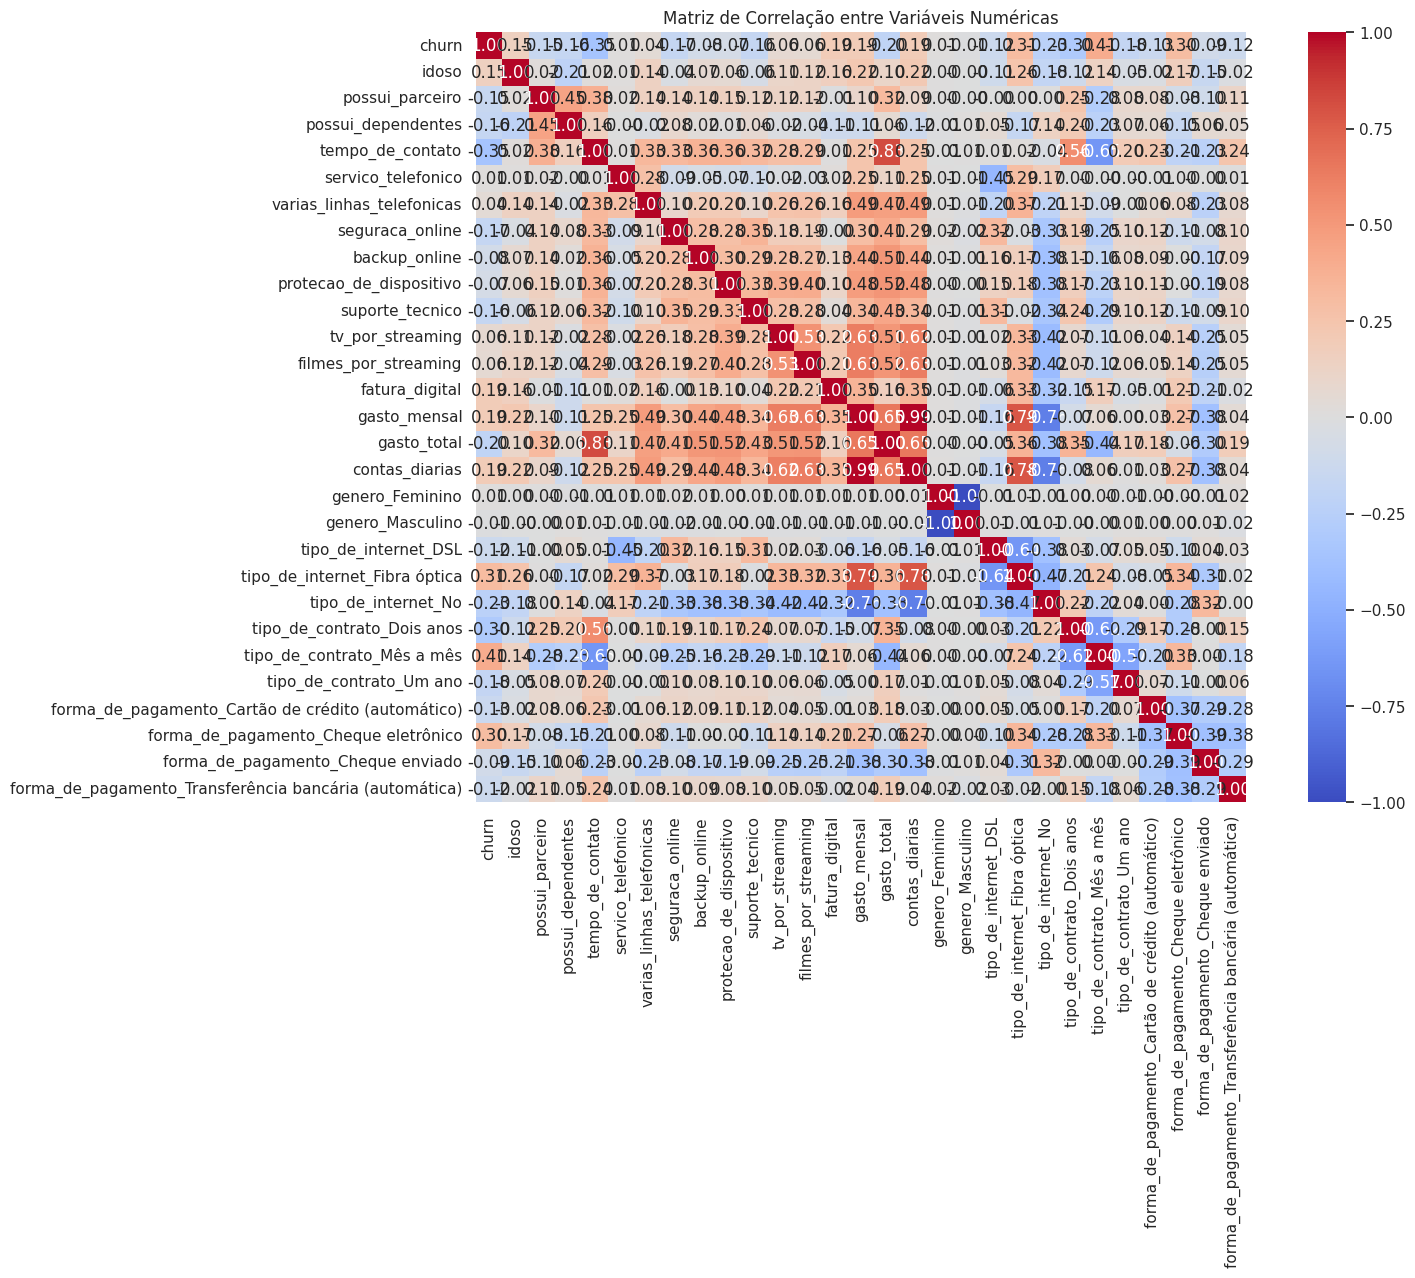

In [193]:
plt.figure(figsize=(16, 10))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

In [194]:
# Correlação das variáveis com a variável-alvo 'churn', ordenada
correlacao_churn = correlacoes['churn'].sort_values(ascending=False)

print("Correlação com churn:")
print(correlacao_churn)

Correlação com churn:
churn                                                     1.000000
tipo_de_contrato_Mês a mês                                0.405103
tipo_de_internet_Fibra óptica                             0.308020
forma_de_pagamento_Cheque eletrônico                      0.301919
gasto_mensal                                              0.193356
contas_diarias                                            0.193301
fatura_digital                                            0.191825
idoso                                                     0.150889
tv_por_streaming                                          0.063228
filmes_por_streaming                                      0.061382
varias_linhas_telefonicas                                 0.040102
servico_telefonico                                        0.011942
genero_Feminino                                           0.008612
genero_Masculino                                         -0.008612
protecao_de_dispositivo                 

/tmp/ipython-input-2023727210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='tempo_de_contato', palette='Set2')


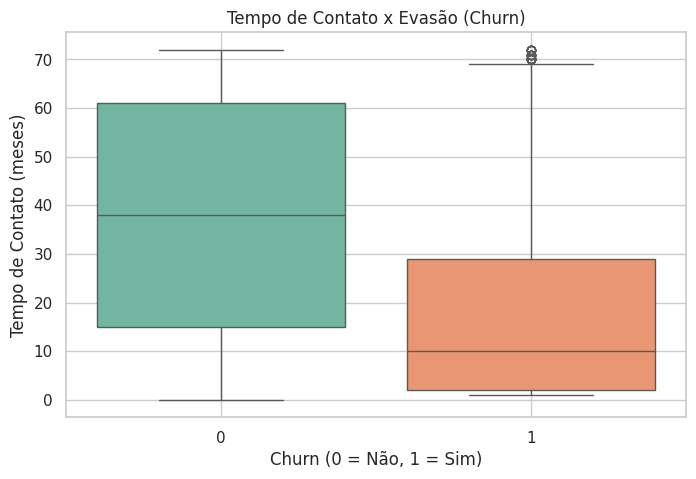

In [195]:
# Boxplot: Tempo de contrato vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='tempo_de_contato', palette='Set2')
plt.title('Tempo de Contato x Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Tempo de Contato (meses)')
plt.grid(True)
plt.show()

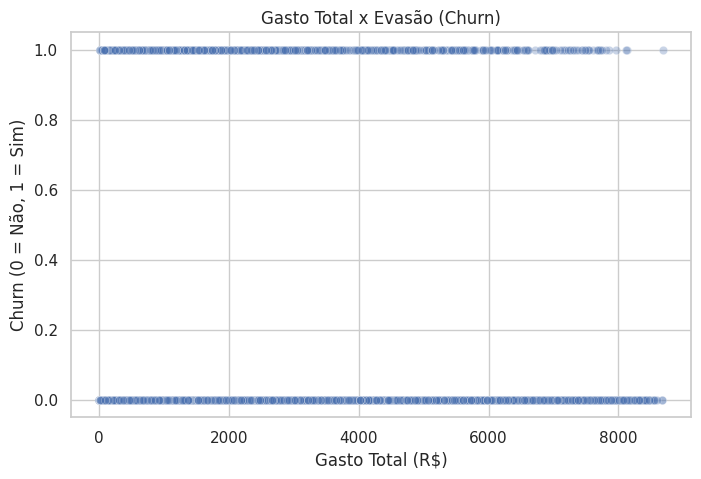

In [196]:
# Scatter Plot: Gasto total vs churn
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='gasto_total', y='churn', alpha=0.3)
plt.title('Gasto Total x Evasão (Churn)')
plt.xlabel('Gasto Total (R$)')
plt.ylabel('Churn (0 = Não, 1 = Sim)')
plt.grid(True)
plt.show()

/tmp/ipython-input-1835142377.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='forma_de_pagamento_Cheque eletrônico', palette='Set2')


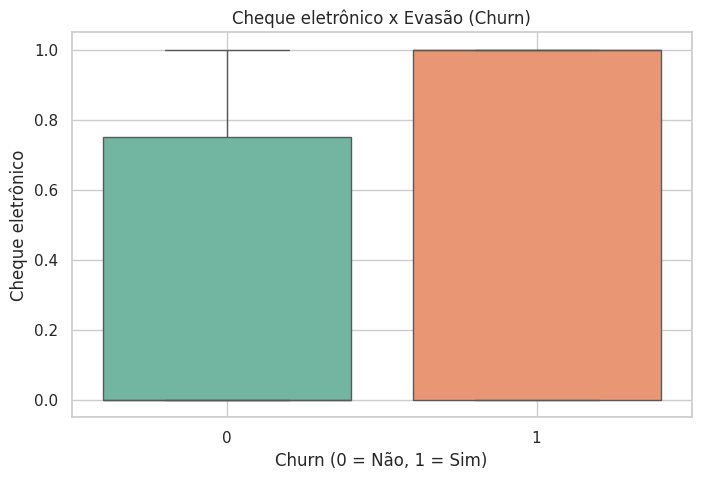

In [197]:
# Boxplot: Cheque eletrônico vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='forma_de_pagamento_Cheque eletrônico', palette='Set2')
plt.title('Cheque eletrônico x Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Cheque eletrônico')
plt.grid(True)
plt.show()

/tmp/ipython-input-698561089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='churn', y='contas_diarias', palette='Set2')


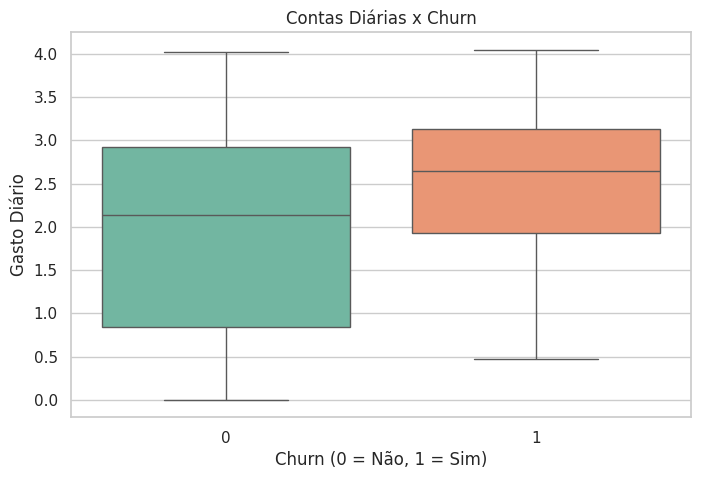

In [198]:
# Boxplot: Contas diárias vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='churn', y='contas_diarias', palette='Set2')
plt.title('Contas Diárias x Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Gasto Diário')
plt.show()

##🤖 Modelagem Preditiva

Modelos e Justificativa:

Regressão Logística:
Fácil de interpretar e entender o impacto das variáveis. Requer dados balanceados para melhorar o desempenho, por isso usar SMOTE.

Precisa normalizar para que o modelo funcione corretamente, pois depende da escala das variáveis para otimizar os coeficientes.

Random Forest:
Captura relações complexas e não lineares. Mais robusto a dados desbalanceados e não precisa de balanceamento para funcionar bem.

Não precisa normalizar porque baseia-se em divisões das variáveis, que não são afetadas pela escala.


Relatório - Regressão Logística com SMOTE
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1552
           1       0.59      0.63      0.61       561

    accuracy                           0.78      2113
   macro avg       0.72      0.73      0.73      2113
weighted avg       0.79      0.78      0.79      2113

AUC-ROC: 0.8333275906426301

Relatório - Random Forest sem balanceamento
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1552
           1       0.64      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113

AUC-ROC: 0.8216509776356653

=== Regressão Logística ===
Acurácia: 0.7841930903928065
Precisão: 0.5873544093178037
Recall: 0.6292335115864528
F1-score: 0.6075731497418244


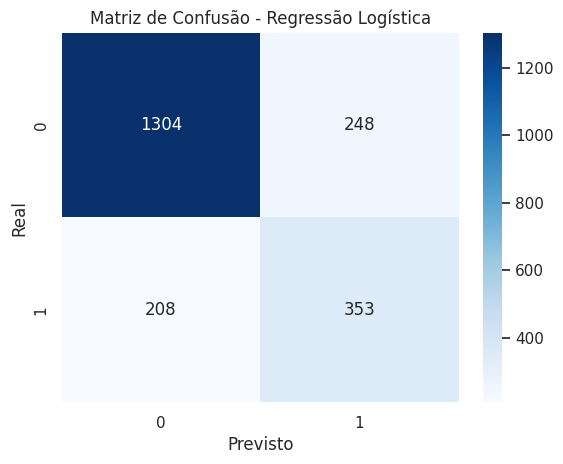


=== Random Forest ===
Acurácia: 0.792238523426408
Precisão: 0.6380090497737556
Recall: 0.5026737967914439
F1-score: 0.5623130608175474


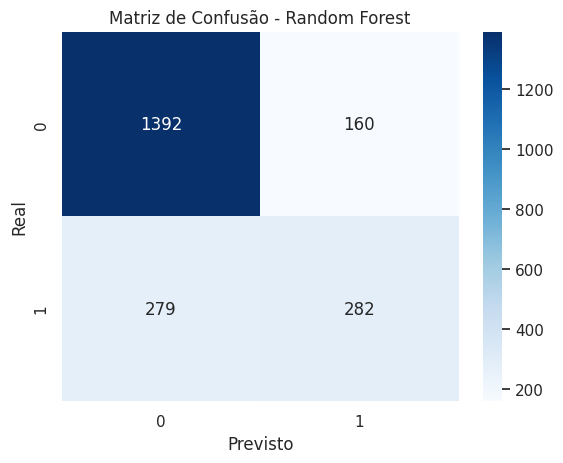

In [204]:
X = df.drop(columns=['churn'])
y = df['churn']

#Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Balancear com SMOTE para Regressão Logística
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Normalizar apenas para Regressão Logística
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Treinar Regressão Logística (com SMOTE e dados normalizados)
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_smote_scaled, y_train_smote)
y_pred_lr = model_lr.predict(X_test_scaled)
y_proba_lr = model_lr.predict_proba(X_test_scaled)[:, 1]

# Treinar Random Forest (sem balanceamento e sem normalização)

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]


# Função para Avaliação dos Modelos

def avaliar(nome, y_test, y_pred):
    print(f"\n=== {nome} ===")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precisão:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()


print("Relatório - Regressão Logística com SMOTE")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_lr))

print("\nRelatório - Random Forest sem balanceamento")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_proba_rf))

avaliar("Regressão Logística", y_test, y_pred_lr)
avaliar("Random Forest", y_test, y_pred_rf)

Regressão Logística com SMOTE
- Teve maior recall e F1-score para a classe minoritária (clientes que evadiram).

- Melhor para identificar evasões, mesmo que com precisão um pouco menor.

- AUC-ROC mais alto, indicando melhor separação geral entre as classes.

Boa escolha para problemas em que é mais importante identificar evasores, mesmo correndo mais risco de falsos positivos. Não parece ter overfitting, pois o desempenho no teste está balanceado.

Random Forest sem balanceamento
- Obteve maior acurácia e precisão, mas pior recall.

- Classificou melhor os clientes que não evadiram, mas teve mais dificuldade com os que evadiram.

- Pode estar desfavorecendo a classe minoritária (evasão) por não estar balanceado. Possível leve overfitting na classe majoritária (acertou bem quem ficou, mas errou muitos que evadiram).

Se o foco for identificar quem vai evadir (mesmo com mais falsos positivos), a Regressão Logística com SMOTE é melhor. Ja se o foco for acertar mais no geral e reduzir falsos positivos, Random Forest pode ser mais útil.

##📋  Interpretação e Conclusões

In [200]:
# Criar um DataFrame com variáveis e seus coeficientes
coef_df = pd.DataFrame({
    'feature': X_train_smote.columns,
    'coeficiente': model_lr.coef_[0]
})

# Ordenar pelo valor absoluto para ver as variáveis mais influentes
coef_df['abs_coef'] = coef_df['coeficiente'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

print("Variáveis mais relevantes - Regressão Logística:")
print(coef_df[['feature', 'coeficiente']])

Variáveis mais relevantes - Regressão Logística:
                                              feature  coeficiente
13                                       gasto_mensal     3.771084
19                      tipo_de_internet_Fibra óptica    -2.181679
17                                   genero_Masculino    -1.998164
16                                    genero_Feminino    -1.949262
25               forma_de_pagamento_Cheque eletrônico    -1.914343
3                                    tempo_de_contato    -1.876719
24  forma_de_pagamento_Cartão de crédito (automático)    -1.674578
26                  forma_de_pagamento_Cheque enviado    -1.672843
27  forma_de_pagamento_Transferência bancária (aut...    -1.659870
21                         tipo_de_contrato_Dois anos    -1.543458
22                         tipo_de_contrato_Mês a mês    -1.337132
23                            tipo_de_contrato_Um ano    -1.292798
14                                        gasto_total     1.193561
4            

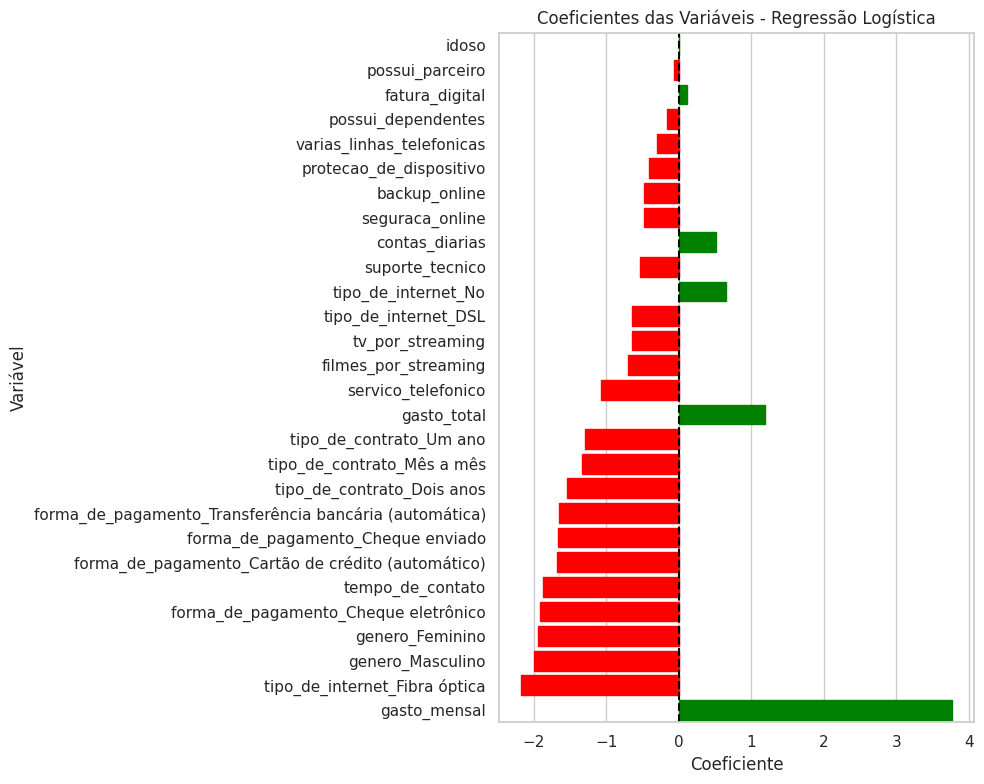

In [201]:
# Ordenar para gráfico horizontal (menor no topo)
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=True)

# Criar coluna de cor
coef_df_sorted['cor'] = coef_df_sorted['coeficiente'].apply(lambda x: 'green' if x > 0 else 'red')

plt.figure(figsize=(10, 8))
sns.barplot(x='coeficiente', y='feature', data=coef_df_sorted, color='gray')

# Colorir barras conforme sinal
bars = plt.gca().patches
for bar, cor in zip(bars, coef_df_sorted['cor']):
    bar.set_color(cor)

plt.axvline(0, color='black', linestyle='--')
plt.title('Coeficientes das Variáveis - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

In [202]:
# Criar DataFrame com importâncias
importancia_df = pd.DataFrame({
    'feature': X_train.columns,
    'importancia': model_rf.feature_importances_
})

# Ordenar decrescentemente
importancia_df = importancia_df.sort_values(by='importancia', ascending=False)

print("Variáveis mais importantes - Random Forest:")
print(importancia_df)

Variáveis mais importantes - Random Forest:
                                              feature  importancia
14                                        gasto_total     0.156111
15                                     contas_diarias     0.132607
13                                       gasto_mensal     0.132268
3                                    tempo_de_contato     0.131775
22                         tipo_de_contrato_Mês a mês     0.074123
25               forma_de_pagamento_Cheque eletrônico     0.033340
19                      tipo_de_internet_Fibra óptica     0.029663
12                                     fatura_digital     0.023543
9                                     suporte_tecnico     0.019515
1                                     possui_parceiro     0.019444
0                                               idoso     0.018666
21                         tipo_de_contrato_Dois anos     0.018584
6                                     seguraca_online     0.017937
7                 

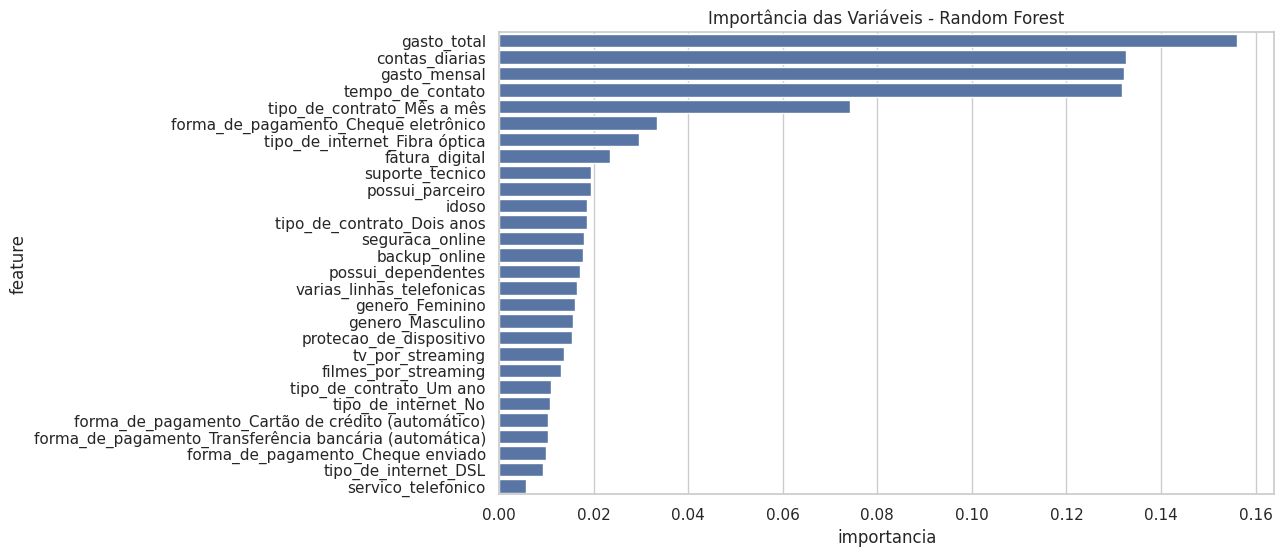

In [203]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='feature', data=importancia_df)
plt.title("Importância das Variáveis - Random Forest")
plt.show()

Conclusão:

Os modelos de Regressão Logística (com SMOTE) e Random Forest apresentaram desempenho parecido, com acurácia em torno de 78-79%. A Regressão Logística identificou melhor os clientes que realmente evadem (recall 63%), enquanto o Random Forest teve maior precisão (64%).

As variáveis que mais influenciam a evasão são:

- Gasto mensal e gasto total: clientes que gastam mais têm maior risco de evasão.

- Tipo de contrato: contratos longos (1 ou 2 anos) reduzem a evasão; contratos mês a mês aumentam o risco.

- Tempo de contato: quanto maior o tempo com a empresa, menor a evasão.

- Tipo de internet: clientes com fibra óptica evadem menos.

- Forma de pagamento: uso de cheque eletrônico está associado a menor evasão.

- Serviços adicionais (suporte técnico, streaming, segurança) ajudam a reduzir evasão, porém com menor impacto.

Estratégias para reduzir evasão:

- Criar planos e benefícios para clientes com gastos altos.

- Incentivar contratos longos com descontos ou vantagens.

- Investir na qualidade da fibra óptica e no suporte técnico.

- Fortalecer o relacionamento com clientes, especialmente os novos.

- Facilitar e promover formas de pagamento que aumentem retenção.